In [2]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from scipy import stats
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
import seaborn as sb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv("../data/selected_M_best50.csv")
df = df.drop_duplicates()
print(df.head())

       HES5      KLHL21        LZIC      CASZ1     EIF2B3     NHLH2  \
0  1.000000  408.378949  119.082494  39.694165  67.951028  1.000000   
1  1.000000  253.319773  118.435219  21.932448  84.439924  3.289867   
2  2.405623  532.444640  122.686792  60.140584  73.772450  4.811247   
3  1.000000  391.074568  132.363700  19.252902  73.401688  1.000000   
4  1.116815  399.819591  139.601812  59.191169  61.424797  4.467258   

        FCRLA       ARID4B        GHITM       FBXW4  ...       MAP1B  \
0   92.171196  1163.913643   958.714995  168.195613  ...  474.311629   
1  245.643416  1383.937462  1178.869074  178.749450  ...  195.198786   
2   77.781822  1048.851791   962.249350  149.148649  ...  212.496731   
3   77.011607  1872.344702  1472.846990  105.890960  ...   13.236370   
4  171.989433  1322.308368  1269.818087  147.419514  ...  293.722214   

        RBM22  LOC202181      NT5C3A        RALA     TAS2R5      SCRIB  \
0  192.415781  87.461719  349.846875  111.009105  12.782867  93.51

In [4]:
# def map_results(inpt):
#     if inpt == 'control':
#         return 0;

#     else:
#         return 1;

In [5]:
# df['Results'] = df['Results'].apply(map_results)
# print(df.head())

In [6]:

df.describe()

,HES5,KLHL21,LZIC,CASZ1,EIF2B3,NHLH2,FCRLA,ARID4B,GHITM,FBXW4,...,MAP1B,RBM22,LOC202181,NT5C3A,RALA,TAS2R5,SCRIB,KANTR,MIR6087,Results
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,...,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,1.160000e+02,116.000000
mean,1.259586,341.190567,136.380108,35.542237,70.846265,1.968033,146.820715,1449.202745,1316.600825,160.215432,...,20716.912287,187.971192,66.840623,505.436399,127.123553,10.770483,76.125851,68.295853,8.035998e+04,0.431034
std,0.812481,132.385307,48.225795,21.990355,19.913995,2.597023,77.459744,271.858239,417.421640,62.692747,...,84011.721085,32.577634,30.962460,324.136759,34.880393,5.816347,47.337180,18.337080,3.235455e+05,0.497369
min,1.000000,66.370880,80.726335,6.675550,34.936667,1.000000,11.368037,963.359058,551.370727,72.174788,...,2.165143,92.258669,11.976700,169.931322,57.206863,1.000000,28.463297,10.013325,5.006662e+00,0.000000
25%,1.000000,262.744890,113.147906,20.884606,60.331200,1.000000,98.410433,1260.592091,1111.321750,128.284451,...,24.096767,166.996277,46.491517,363.940982,100.420778,6.760047,48.660437,56.578993,2.865210e+01,0.000000
50%,1.000000,315.817003,126.301624,29.805489,67.975505,1.000000,139.031060,1428.608277,1266.457106,149.552023,...,197.766605,182.608289,61.095707,428.973892,120.669975,9.806288,62.552115,70.584817,3.360720e+02,0.000000
75%,1.000000,393.077684,143.457188,42.480009,78.519162,1.322418,179.437853,1618.644680,1436.113204,175.558203,...,626.153699,206.190550,78.446788,526.342648,144.419211,14.184730,90.669097,80.458632,1.928659e+03,1.000000
max,6.066065,1136.361050,467.984177,131.575287,175.589013,17.621690,523.872716,2378.841837,4642.026371,600.611272,...,575118.397900,278.276654,218.889588,3262.626531,257.544212,29.253762,332.023532,105.574372,2.566614e+06,1.000000


In [7]:
df_features = list(df.columns)
print(df_features)
print(len(df.columns))

['HES5', 'KLHL21', 'LZIC', 'CASZ1', 'EIF2B3', 'NHLH2', 'FCRLA', 'ARID4B', 'GHITM', 'FBXW4', 'MIR3663HG', 'NLRP6', 'PHF21A', 'SF1', 'TMEM134', 'TRIM29', 'PABPN1', 'SPTB', 'MIR4537', 'HBA1', 'SNX29P1', 'KIAA0556', 'KAT8', 'CLEC18C', 'CTDNEP1', 'NFIX', 'JUND', 'MAU2', 'ERCC2', 'TMEM160', 'MED25', 'ZNF582', 'MIR663AHG', 'MIR663A', 'HSPA13', 'DGCR10', 'SELO', 'VHL', 'PXK', 'ZBTB20-AS1', 'LOC101243545', 'MAP1B', 'RBM22', 'LOC202181', 'NT5C3A', 'RALA', 'TAS2R5', 'SCRIB', 'KANTR', 'MIR6087', 'Results']
51


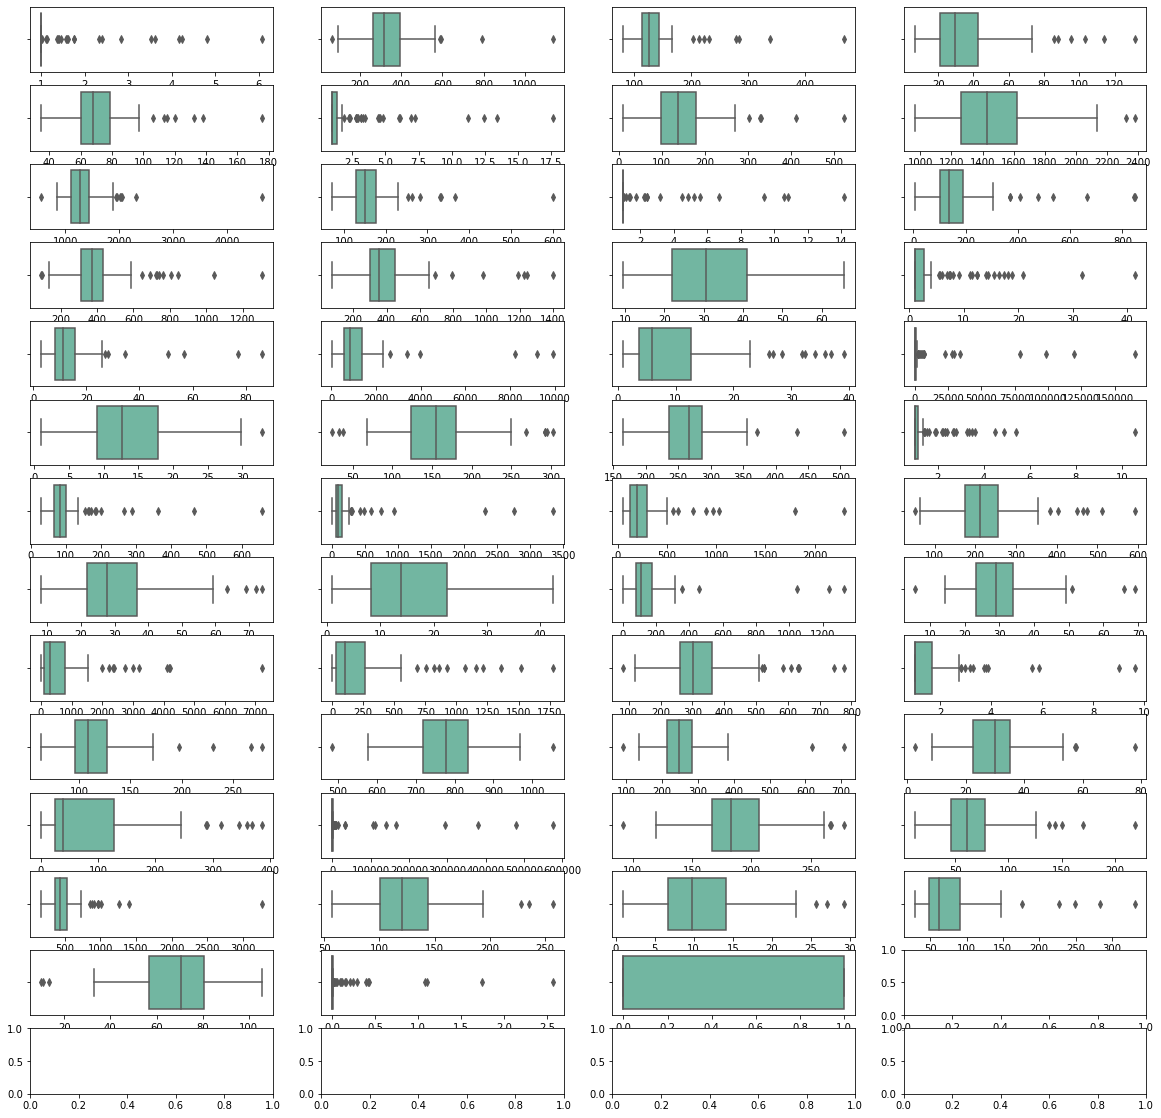

In [8]:
fig, axes = plt.subplots(14,4, figsize=(20,20))
x_,y_ = 0,0
for i, column in enumerate(df.columns[0:]):    
    sb.boxplot(x=df[column], ax=axes[x_,y_], palette="Set2")
    if i < 3:
        y_ += 1
    elif i == 3: 
        x_ = 1
        y_ = 0
    elif i == 7:
        x_ = 2
        y_ = 0
    elif i == 11:
        x_ = 3
        y_ = 0
    elif i == 15:
        x_ = 4
        y_ = 0
    elif i == 19:
        x_ = 5
        y_ = 0
    elif i == 23:
        x_ = 6
        y_ = 0
    elif i == 27:
        x_ = 7
        y_ = 0
    elif i == 31:
        x_ = 8
        y_ = 0
    elif i == 35:
        x_ = 9
        y_ = 0
    elif i == 39:
        x_ = 10
        y_ = 0
    elif i == 43:
        x_ = 11
        y_ = 0
    elif i == 47:
        x_ = 12
        y_ = 0
    elif i == 51:
        x_ = 13
        y_ = 0
    else:
        y_ += 1

In [9]:
cols = df.columns
print(cols)
scaler = MinMaxScaler()
dat = scaler.fit_transform(df)
df_02 = pd.DataFrame(data=dat, columns=cols)  
print(df_02.head())

Index(['HES5', 'KLHL21', 'LZIC', 'CASZ1', 'EIF2B3', 'NHLH2', 'FCRLA', 'ARID4B',
       'GHITM', 'FBXW4', 'MIR3663HG', 'NLRP6', 'PHF21A', 'SF1', 'TMEM134',
       'TRIM29', 'PABPN1', 'SPTB', 'MIR4537', 'HBA1', 'SNX29P1', 'KIAA0556',
       'KAT8', 'CLEC18C', 'CTDNEP1', 'NFIX', 'JUND', 'MAU2', 'ERCC2',
       'TMEM160', 'MED25', 'ZNF582', 'MIR663AHG', 'MIR663A', 'HSPA13',
       'DGCR10', 'SELO', 'VHL', 'PXK', 'ZBTB20-AS1', 'LOC101243545', 'MAP1B',
       'RBM22', 'LOC202181', 'NT5C3A', 'RALA', 'TAS2R5', 'SCRIB', 'KANTR',
       'MIR6087', 'Results'],
      dtype='object')
       HES5    KLHL21      LZIC     CASZ1    EIF2B3     NHLH2     FCRLA  \
0  0.000000  0.319637  0.099046  0.264361  0.234723  0.000000  0.157663   
1  0.000000  0.174720  0.097374  0.122153  0.351955  0.137764  0.457119   
2  0.277459  0.435587  0.108353  0.428064  0.276112  0.229294  0.129587   
3  0.000000  0.303464  0.133341  0.100700  0.273476  0.000000  0.128084   
4  0.023058  0.311637  0.152032  0.420462  0.18

In [10]:
x = df_02.drop(["Results"], axis =1);
y = df["Results"]
print(y.value_counts())

0    66
1    50
Name: Results, dtype: int64


(array([66.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

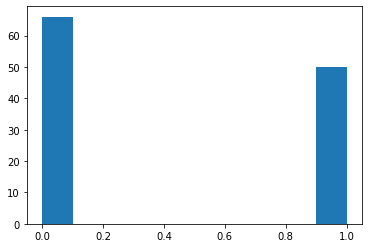

In [11]:
plt.hist(y)

1    66
0    66
Name: Results, dtype: int64


(array([66.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 66.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

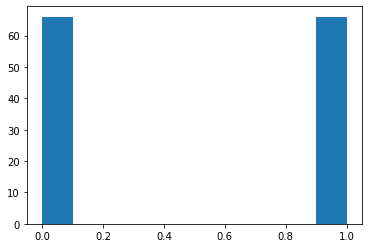

In [12]:
smt = SMOTE()
X, Y = smt.fit_resample(x,y)
print(Y.value_counts())
plt.hist(Y)

In [13]:
# creating a decision tree classifier
dt_model = tree.DecisionTreeClassifier()
param_grid_dt = {
     
}
cv_array = [2,3,4,5]
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {}
Accuracy :  76.515
Standed deviation :  5.303
CV value :  3
Parameters :  {}
Accuracy :  71.970
Standed deviation :  1.071
CV value :  4
Parameters :  {}
Accuracy :  75.000
Standed deviation :  7.836
CV value :  5
Parameters :  {}
Accuracy :  75.071
Standed deviation :  9.587


In [14]:
# creating a Gradient boosting classifier
gb_model = GradientBoostingClassifier()
param_grid_gb = {
     'random_state': [0, 1, 2,3,4,5 , 10, 20, 30, 40, 50]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'random_state': 0}
Accuracy :  81.061
Standed deviation :  0.758
CV value :  3
Parameters :  {'random_state': 3}
Accuracy :  80.303
Standed deviation :  2.835
CV value :  4
Parameters :  {'random_state': 0}
Accuracy :  80.303
Standed deviation :  7.576
CV value :  5
Parameters :  {'random_state': 5}
Accuracy :  79.601
Standed deviation :  6.855


In [15]:
# creating a KNN classifier
KNN_model =KNeighborsClassifier()
param_grid_knn = {
     'n_neighbors': [3, 5, 7, 11, 13, 17]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=KNN_model, param_grid=param_grid_knn, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'n_neighbors': 7}
Accuracy :  77.273
Standed deviation :  0.000
CV value :  3
Parameters :  {'n_neighbors': 7}
Accuracy :  76.515
Standed deviation :  1.071
CV value :  4
Parameters :  {'n_neighbors': 5}
Accuracy :  80.303
Standed deviation :  5.025
CV value :  5
Parameters :  {'n_neighbors': 3}
Accuracy :  79.658
Standed deviation :  8.537


In [16]:
# creating a Lgistic regression classifier
lr_model = LogisticRegression() 

param_grid_lr = {
     'max_iter': [100, 200, 300, 400, 500]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'max_iter': 100}
Accuracy :  74.242
Standed deviation :  1.515
CV value :  3
Parameters :  {'max_iter': 100}
Accuracy :  71.212
Standed deviation :  1.071
CV value :  4
Parameters :  {'max_iter': 100}
Accuracy :  74.242
Standed deviation :  3.388
CV value :  5
Parameters :  {'max_iter': 100}
Accuracy :  76.467
Standed deviation :  8.318


In [17]:
# creating a Nave Bayers classifier
nb_model = MultinomialNB()
param_grid_nb = {

}
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {}
Accuracy :  64.394
Standed deviation :  2.273
CV value :  3
Parameters :  {}
Accuracy :  66.667
Standed deviation :  3.863
CV value :  4
Parameters :  {}
Accuracy :  69.697
Standed deviation :  7.726
CV value :  5
Parameters :  {}
Accuracy :  70.399
Standed deviation :  7.523


In [18]:
# creating a SVM classifier
svm_model = svm.SVC()
param_grid_svm = {
     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'kernel': 'poly'}
Accuracy :  79.545
Standed deviation :  3.788
CV value :  3
Parameters :  {'kernel': 'poly'}
Accuracy :  78.788
Standed deviation :  3.863
CV value :  4
Parameters :  {'kernel': 'poly'}
Accuracy :  78.788
Standed deviation :  7.107
CV value :  5
Parameters :  {'kernel': 'poly'}
Accuracy :  80.342
Standed deviation :  5.959


In [19]:
# creating a Random forest classifier
rf = RandomForestClassifier()
param_grid_rf = {
     'max_depth': [80, 90, 100, 110, 150, 200, 300],
     'max_features': [2, 3, 4, 5,6],
     'n_estimators': [100, 200, 300]
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'max_depth': 300, 'max_features': 4, 'n_estimators': 300}
Accuracy :  84.848
Standed deviation :  3.030
CV value :  3
Parameters :  {'max_depth': 100, 'max_features': 5, 'n_estimators': 100}
Accuracy :  83.333
Standed deviation :  1.071
CV value :  4
Parameters :  {'max_depth': 150, 'max_features': 4, 'n_estimators': 300}
Accuracy :  86.364
Standed deviation :  6.247
CV value :  5
Parameters :  {'max_depth': 110, 'max_features': 2, 'n_estimators': 100}
Accuracy :  84.843
Standed deviation :  4.222
